Import libraries

In [101]:
import cenpy as cen
import numpy as np
import pandas as pd
import pysal
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

## Establish a Connection to a U.S. Census API

In [102]:
# Identify all of the available US Census Bureau API's
datasets = list(cen.explorer.available(verbose=True).items())

# Display the DataFrame
with pd.option_context('display.max_rows', None):
    display(pd.DataFrame(datasets))

,0,1
0,NONEMP2007,2007 Nonemployer Statistics: Non Employer Statistics
1,POPESTagesex,Vintage 2014 Population Estimates: National Annual Resident Population Estimates by Single Year of Age and Sex
2,ZBPTotal2011,2011 County Business Patterns - Zip Code Business Patterns: Total For Zip Code
3,ITMONTHLYIMPORTSUSDA,TEST Time Series International Trade: Monthly U.S. Imports by Department of Agriculture Code
4,POPESTnatmonthly2015,Vintage 2015 Population Estimates: National Monthly Population Estimates
5,POPESTcochar62014,"Vintage 2014 Population Estimates: County Population Estimates by 5 Year Age Groups, Sex, 6 Races, and Hispanic Origin"
6,ACSST1Y2011,BETA ACS 1-Year Subject Tables
7,ITMONTHLYEXPORTSHITECH,Time Series International Trade: Monthly U.S. Exports by Advanced Technology Code
8,ZBPTotal2013,2013 County Business Patterns - Zip Code Business Patterns: Total For Zip Code
9,EconCensusEWKS2007,2007 Economic Census - All Sectors: Economy-Wide Key Statistics


In [163]:
# Select Detailed Tables dataset
dataset = 'ACSDT5Y2017'

In [165]:
# Establish a connection with the Detailed Tables API
con = cen.base.Connection(dataset)
con

Connection to ACS 5-Year Detailed Tables (ID: https://api.census.gov/data/id/ACSDT5Y2017)

In [177]:
# Explore the available search paramaters
vars = con.variables
vars.head(5)

,attributes,concept,group,label,limit,predicateOnly,predicateType,required,values
for,NaN,Census API Geography Specification,N/A,Census API FIPS 'for' clause,0,True,fips-for,NaN,NaN
in,NaN,Census API Geography Specification,N/A,Census API FIPS 'in' clause,0,True,fips-in,NaN,NaN
ucgid,NaN,Census API Geography Specification,N/A,Uniform Census Geography Identifier clause,0,True,ucgid,NaN,NaN
B06004HPR_002E,"B06004HPR_002M,B06004HPR_002MA,B06004HPR_002EA","PLACE OF BIRTH (WHITE ALONE, NOT HISPANIC OR LATINO) IN PUERTO RICO",B06004HPR,Estimate!!Total!!Born in Puerto Rico,0,NaN,int,NaN,NaN
B02019_008E,"B02019_008M,B02019_008MA,B02019_008EA",NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE OR IN ANY COMBINATION BY SELECTED GROUPS,B02019,Estimate!!Total Groups Tallied!!Micronesian!!Other Micronesian,0,NaN,int,NaN,NaN


In [178]:
#Identify columns of interest by searching key words
vars[vars['label'].str.contains("poverty")]

,attributes,concept,group,label,limit,predicateOnly,predicateType,required,values
C27018_005E,"C27018_005EA,C27018_005M,C27018_005MA",PUBLIC HEALTH INSURANCE BY RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY AGE,C27018,Estimate!!Total!!Under 1.00 of poverty threshold!!Under 19 years!!No public coverage,0,NaN,int,NaN,NaN
C27018_006E,"C27018_006EA,C27018_006M,C27018_006MA",PUBLIC HEALTH INSURANCE BY RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY AGE,C27018,Estimate!!Total!!Under 1.00 of poverty threshold!!19 to 64 years,0,NaN,int,NaN,NaN
C27018_004E,"C27018_004EA,C27018_004M,C27018_004MA",PUBLIC HEALTH INSURANCE BY RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY AGE,C27018,Estimate!!Total!!Under 1.00 of poverty threshold!!Under 19 years!!With public coverage,0,NaN,int,NaN,NaN
C27018_003E,"C27018_003EA,C27018_003M,C27018_003MA",PUBLIC HEALTH INSURANCE BY RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY AGE,C27018,Estimate!!Total!!Under 1.00 of poverty threshold!!Under 19 years,0,NaN,int,NaN,NaN
C27018_002E,"C27018_002EA,C27018_002M,C27018_002MA",PUBLIC HEALTH INSURANCE BY RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY AGE,C27018,Estimate!!Total!!Under 1.00 of poverty threshold,0,NaN,int,NaN,NaN
C27018_009E,"C27018_009EA,C27018_009M,C27018_009MA",PUBLIC HEALTH INSURANCE BY RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY AGE,C27018,Estimate!!Total!!Under 1.00 of poverty threshold!!65 years and over,0,NaN,int,NaN,NaN
C27018_008E,"C27018_008EA,C27018_008M,C27018_008MA",PUBLIC HEALTH INSURANCE BY RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY AGE,C27018,Estimate!!Total!!Under 1.00 of poverty threshold!!19 to 64 years!!No public coverage,0,NaN,int,NaN,NaN
C27018_007E,"C27018_007EA,C27018_007M,C27018_007MA",PUBLIC HEALTH INSURANCE BY RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY AGE,C27018,Estimate!!Total!!Under 1.00 of poverty threshold!!19 to 64 years!!With public coverage,0,NaN,int,NaN,NaN
C27018_011E,"C27018_011EA,C27018_011M,C27018_011MA",PUBLIC HEALTH INSURANCE BY RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY AGE,C27018,Estimate!!Total!!Under 1.00 of poverty threshold!!65 years and over!!No public coverage,0,NaN,int,NaN,NaN
C27018_010E,"C27018_010EA,C27018_010M,C27018_010MA",PUBLIC HEALTH INSURANCE BY RATIO OF INCOME TO POVERTY LEVEL IN THE PAST 12 MONTHS BY AGE,C27018,Estimate!!Total!!Under 1.00 of poverty threshold!!65 years and over!!With public coverage,0,NaN,int,NaN,NaN


## Access U.S. Census Population Data

In [168]:
# Select white population ('B03002_003E'), total population ('B01003_001E'), 
# and population below the poverty line ('B17001_002E')
cols = ['B03002_003E','B01003_001E', 'B17001_002E']

In [169]:
# Explore the columns from the Detailed Tables dataset
cols_detail=pd.DataFrame(con.variables.loc[cols].label)

with pd.option_context('display.max_colwidth',0):
    display(cols_detail)
# Columns can be explored more here: https://api.census.gov/data/2017/acs/acs5/groups/B03002.html
# And here: https://api.census.gov/data/2017/acs/acs5/variables.html

,label
B03002_003E,Estimate!!Total!!Not Hispanic or Latino!!White alone
B01003_001E,Estimate!!Total
B17001_002E,Estimate!!Total!!Income in the past 12 months below poverty level


In [179]:
data_DT = con.query(cols_DT, geo_unit = 'tract', geo_filter = {'state':'34'})
# Prints a deprecation warning because of how cenpy calls pandas

C:\Users\zstat\Anaconda2\envs\py36\lib\site-packages\cenpy\remote.py:172: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df[cols] = df[cols].convert_objects(convert_numeric=convert_numeric)


In [162]:
data_DT.head(10)

,B03002_003E,B01003_001E,B17001_002E,state,county,tract
0,2061,3769,116,34,007,603100
1,2926,3537,132,34,007,603601
2,4800,5369,215,34,007,603800
3,231,5746,1895,34,007,601500
4,2843,3442,262,34,007,604400
5,2119,2212,142,34,007,605100
6,4300,7270,432,34,007,603400
7,2411,3488,98,34,007,603505
8,4269,5987,99,34,007,603506
9,147,1500,512,34,007,601800


## Plot TIGER shapefile

In [115]:
# Determine what Topologically Integrated Geopgrahic Encoding and Referencing (TIGER) data is available
cen.tiger.available()

[{'name': 'AIANNHA', 'type': 'MapServer'},
 {'name': 'CBSA', 'type': 'MapServer'},
 {'name': 'Hydro_LargeScale', 'type': 'MapServer'},
 {'name': 'Hydro', 'type': 'MapServer'},
 {'name': 'Labels', 'type': 'MapServer'},
 {'name': 'Legislative', 'type': 'MapServer'},
 {'name': 'Places_CouSub_ConCity_SubMCD', 'type': 'MapServer'},
 {'name': 'PUMA_TAD_TAZ_UGA_ZCTA', 'type': 'MapServer'},
 {'name': 'Region_Division', 'type': 'MapServer'},
 {'name': 'School', 'type': 'MapServer'},
 {'name': 'Special_Land_Use_Areas', 'type': 'MapServer'},
 {'name': 'State_County', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2013', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2014', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2015', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2016', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2017', 'type': 'MapServer'},
 {'name': 'tigerWMS_ACS2018', 'type': 'MapServer'},
 {'name': 'tigerWMS_Census2010', 'type': 'MapServer'},
 {'name': 'tigerWMS_Current', 'type': 'MapServer

In [116]:
# Connect to TIGER API
conDT.set_mapservice('tigerWMS_ACS2017')

# Print layers
conDT.mapservice.layers

{0: (ESRILayer) 2010 Census Public Use Microdata Areas,
 1: (ESRILayer) 2010 Census Public Use Microdata Areas Labels,
 2: (ESRILayer) 2010 Census ZIP Code Tabulation Areas,
 3: (ESRILayer) 2010 Census ZIP Code Tabulation Areas Labels,
 4: (ESRILayer) Tribal Census Tracts,
 5: (ESRILayer) Tribal Census Tracts Labels,
 6: (ESRILayer) Tribal Block Groups,
 7: (ESRILayer) Tribal Block Groups Labels,
 8: (ESRILayer) Census Tracts,
 9: (ESRILayer) Census Tracts Labels,
 10: (ESRILayer) Census Block Groups,
 11: (ESRILayer) Census Block Groups Labels,
 12: (ESRILayer) Unified School Districts,
 13: (ESRILayer) Unified School Districts Labels,
 14: (ESRILayer) Secondary School Districts,
 15: (ESRILayer) Secondary School Districts Labels,
 16: (ESRILayer) Elementary School Districts,
 17: (ESRILayer) Elementary School Districts Labels,
 18: (ESRILayer) Estates,
 19: (ESRILayer) Estates Labels,
 20: (ESRILayer) County Subdivisions,
 21: (ESRILayer) County Subdivisions Labels,
 22: (ESRILayer) 

In [117]:
# Select County data
# Note: By selecting "geopandas"m I am packing the shape into a GeoPandas datagrame. 
# The default is a pySAL shape. Another option is "shapely"
geodata = conDT.mapservice.query(layer=8, where='STATE=34', pkg='geopandas')

In [121]:
# Preview the geodata
with pd.option_context('display.max_colwidth', 20):
    display(geodata.head(5))

,AREALAND,AREAWATER,BASENAME,CENTLAT,CENTLON,COUNTY,FUNCSTAT,GEOID,INTPTLAT,INTPTLON,LSADC,MTFCC,NAME,OBJECTID,OID,STATE,STGEOMETRY.AREA,STGEOMETRY.LEN,TRACT,geometry
0,2045098,2421092,7137,+40.0591547,-074.0846083,029,S,34029713700,+40.0633714,-074.0861089,CT,G5020,Census Tract 7137,296,20757537527182,34,7.632871e+06,18250.432033,713700,POLYGON ((-82498...
1,6947272,4268255,7138,+40.0428715,-074.0768848,029,S,34029713800,+40.0429809,-074.0753939,CT,G5020,Census Tract 7138,337,20757537527132,34,1.915864e+07,21673.434238,713800,POLYGON ((-82500...
2,1052665,0,34.02,+40.9153571,-074.0055605,003,S,34003003402,+40.9153571,-074.0055605,CT,G5020,Census Tract 34.02,455,20757707077793,34,1.845163e+06,6736.463432,003402,POLYGON ((-82390...
3,1418062,9362,35,+40.9177332,-073.9890303,003,S,34003003500,+40.9175862,-073.9884116,CT,G5020,Census Tract 35,456,20757707077513,34,2.502242e+06,6913.314607,003500,POLYGON ((-82373...
4,1489434,0,139,+40.8142812,-074.1730998,013,S,34013013900,+40.8142812,-074.1730998,CT,G5020,Census Tract 139,554,20757428058875,34,2.602867e+06,6644.963532,013900,POLYGON ((-82581...


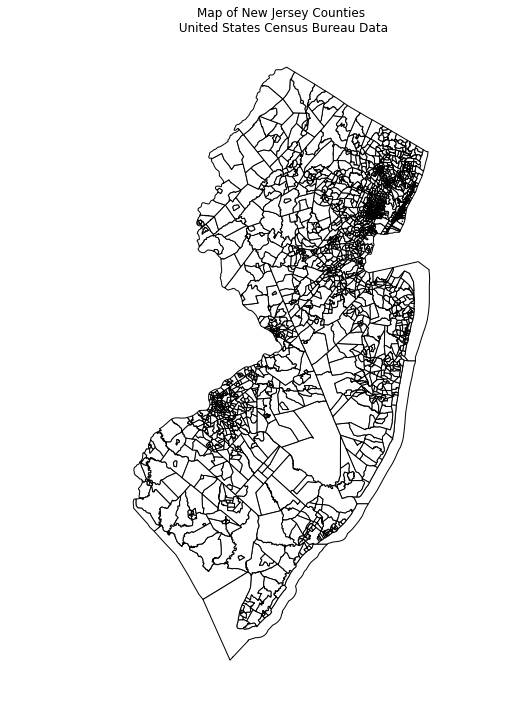

In [119]:
# Plot the data
fig, ax = plt.subplots(figsize = (8,12))
geodata.plot(ax = ax, facecolor='white',edgecolor='black')

# Add title to map
ax.set(title = "Map of New Jersey Counties\n United States Census Bureau Data")

# Turn off the axis
plt.axis('equal')
ax.set_axis_off()
plt.show()

In [120]:
# View the coordinate system
geodata.crs

{'wkid': 102100, 'latestWkid': 3857}